<a href="https://colab.research.google.com/github/aleynasancakli/Global-AI-Hub-Deep-Learning-Bootcamp-Project/blob/main/cnndeeplearningmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerekli kütüphaneleri indirme;

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from glob import glob # allows us to read multiple files in a directory. 

# Ses işleme için (Fakat hazır spectogramları kullandığımız için librosa'ya ihtiyaç duymadık)
import librosa
import librosa.display

# Görüntü işlemek için
import cv2 
import matplotlib.pylab as plt

#  for interacting with the operating system
import os

from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

# to play some of the audios
import IPython.display as ipd

import pickle

# Colab'i Google Drive'a bağlama

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


# Loading Datasets

In [ ]:
pickle_file_link = "/content/drive/MyDrive/datasets"
X_train = pickle.load(open(f"{pickle_file_link}/X_train.pickle", "rb"))
y_train = pickle.load(open(f"{pickle_file_link}/y_train.pickle", "rb"))

X_val = pickle.load(open(f"{pickle_file_link}/X_val.pickle", "rb"))
y_val = pickle.load(open(f"{pickle_file_link}/y_val.pickle", "rb"))

X_test = pickle.load(open(f"{pickle_file_link}/X_test.pickle", "rb"))
y_test = pickle.load(open(f"{pickle_file_link}/y_test.pickle", "rb"))

# Creating CNN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras import Sequential



from keras.layers import Dense, Dropout, Flatten, Activation


model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
                 input_shape = (128,128,1)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       409728    
                                                        

## Compile the model

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



## Train the model for 50 epochs 

In [ ]:
X_trainn = np.array(X_train)
y_trainn = np.array(y_train)
X_testt = np.array(X_test)
y_testt = np.array(y_test)
X_vall = np.array(X_val)
y_vall = np.array(y_val)

results = model.fit(X_trainn, y_trainn, batch_size = 128, epochs=50, validation_data = (X_vall, y_vall))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


52/52 [==============================] - 29s 300ms/step - loss: 1.7109 - accuracy: 0.3808 - val_loss: 1.4736 - val_accuracy: 0.4950
Epoch 2/50
52/52 [==============================] - 13s 250ms/step - loss: 1.1615 - accuracy: 0.6038 - val_loss: 1.0781 - val_accuracy: 0.6737
Epoch 3/50
52/52 [==============================] - 13s 251ms/step - loss: 0.8633 - accuracy: 0.7119 - val_loss: 0.7827 - val_accuracy: 0.7507
Epoch 4/50
52/52 [==============================] - 13s 252ms/step - loss: 0.6754 - accuracy: 0.7722 - val_loss: 0.7017 - val_accuracy: 0.7644
Epoch 5/50
52/52 [==============================] - 13s 252ms/step - loss: 0.5572 - accuracy: 0.8180 - val_loss: 0.7558 - val_accuracy: 0.7360
Epoch 6/50
52/52 [==============================] - 13s 252ms/step - loss: 0.4648 - accuracy: 0.8455 - val_loss: 0.4620 - val_accuracy: 0.8570
Epoch 7/50
52/52 [==============================] - 13s 253ms/step - loss: 0.3777 - accuracy: 0.8757 - val_loss: 0.4695 - val_accuracy: 0.8579
Epoch 8/50

## Plot the the training loss and accuracy


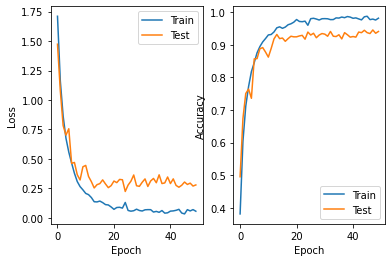

In [ ]:
plt.subplot(121)
plt.plot(results.history["loss"], label = "Train")
plt.plot(results.history["val_loss"], label = "Test")
plt.ylabel("Loss")
plt.xlabel("Epoch")
# Put legend table
plt.legend()


plt.subplot(122)
plt.plot(results.history["accuracy"], label = "Train")
plt.plot(results.history["val_accuracy"], label= "Test")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
# Put legend table
plt.legend()

# Show the plot
plt.show()


## Evaluate the performance

In [ ]:
test_result = model.test_on_batch(X_testt, y_testt)

# Print the result [loss, accuracy]
print(f"Loss: {test_result[0]}, Accuracy: {test_result[1]}")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Loss: 0.27935492992401123, Accuracy: 0.9349817037582397


# Hyperparameter Optimization


In [ ]:
model.add(Dropout(0.5))

results = model.fit(X_trainn, y_trainn, batch_size = 64, epochs=100, validation_data = (X_vall, y_vall))
test_result = model.test_on_batch(X_testt, y_testt)

# Print the result [loss, accuracy]
print(f"Loss: {test_result[0]}, Accuracy: {test_result[1]}")

Epoch 1/100
103/103 [==============================] - 16s 134ms/step - loss: 0.1193 - accuracy: 0.9640 - val_loss: 0.3799 - val_accuracy: 0.9157
Epoch 2/100
103/103 [==============================] - 13s 130ms/step - loss: 0.1353 - accuracy: 0.9568 - val_loss: 0.3097 - val_accuracy: 0.9248
Epoch 3/100
103/103 [==============================] - 13s 130ms/step - loss: 0.1349 - accuracy: 0.9545 - val_loss: 0.2754 - val_accuracy: 0.9212
Epoch 4/100
103/103 [==============================] - 13s 131ms/step - loss: 0.1214 - accuracy: 0.9656 - val_loss: 0.3126 - val_accuracy: 0.9248
Epoch 5/100
103/103 [==============================] - 14s 131ms/step - loss: 0.0983 - accuracy: 0.9689 - val_loss: 0.3647 - val_accuracy: 0.9093
Epoch 6/100
103/103 [==============================] - 14s 131ms/step - loss: 0.0966 - accuracy: 0.9707 - val_loss: 0.2841 - val_accuracy: 0.9303
Epoch 7/100
103/103 [==============================] - 14s 131ms/step - loss: 0.0723 - accuracy: 0.9782 - val_loss: 0.2662 -